<a href="https://colab.research.google.com/github/shivanshus/Machine-Learning-Projects/blob/main/Digit_classification_using_logistic_and_feed_forward_netsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


## Data preprocessing

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Data.csv")
data.head()

,Unnamed: 0,ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,...,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,3211,3546,4038,4096,3218,3032,3269,2740,3459,2767,3354,4049,3184,3495,3139,2810,3444,3130,3786,3682,2665,3100,2990,3175,2826,4295,8565,4002,...,3438,2773,2778,3467,2753,3097,3504,2764,2746,2913,3179,3088,2678,4710,3034,3127,3409,3571,2669,3523,3476,3685,3138,2727,2808,3209,3233,3271,2804,3687,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,340,6649,8660,447,218,6869,8869,228,352581,187,12034,353,349,154,6735,307,278,209,688,266,321,213,12372,309,196,296,8979,301,...,547,617,452,504,449,503,400,401,797,497,353,368,312,7506,6878,394,6910,8206,223,385,442,6813,484,424,352,519,265,290,451,6536,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,2457,2655,2669,9113,2584,2788,2487,2782,2611,2301,2706,2968,2808,2408,2416,2677,2327,2788,2972,2659,2433,2267,2893,2575,2482,2801,2565,2524,2327,...,2572,2565,2675,2473,2642,2456,2728,2369,2552,2746,2511,2246,2454,22304,2514,2804,2660,3042,2554,2520,2755,2619,2491,2537,2409,2456,2685,2598,2325,2358,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,473,516,445,808,432,403,705,1067,407,389,423,644,520,413,412,520,404,360,369,478,377,342,363,926,350,371,366,950,566,...,828,522,357,543,454,480,355,405,398,566,404,358,366,2899,718,412,943,857,406,389,340,886,519,472,438,603,348,446,478,873,485,462,516,1133,471,761,7998,13940,0.574219,1
4,4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,223,237,226,406,643,213,272,447,242,240,236,437,693,240,217,348,286,240,207,350,229,214,230,418,441,334,282,398,486,...,245,246,243,205,221,258,768,274,223,261,250,231,225,546,543,310,255,379,211,273,223,374,527,212,229,492,345,483,847,947,350,209,239,653,221,242,2199,9008,0.370850,8


In [4]:
columns = data.columns
x = []
not_to_include = ['Unnamed: 0', 'ID', 'Class']
for column in columns:
    if column not in not_to_include:
        x.append(column)

X = data[x]
Y = data[["Class"]]

In [5]:
train_x, testval_x, train_y, testval_y = train_test_split(X, Y, test_size=0.20, random_state=None, shuffle=True)
val_x, test_x, val_y, test_y = train_test_split(testval_x, testval_y, test_size=0.25, random_state=None, shuffle=True)

# Multi-Layered Perceptron

In [15]:
# avoiding validation since that will be computationally expensive and time consuming
# hence, playing with the model by tweaking the values of the hyperparameters

mlp = MLPClassifier(activation='tanh', solver='sgd', max_iter=1000, hidden_layer_sizes=(250, 150), random_state=None, tol=1e-9, verbose=2)

In [20]:
mlp.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.56174226
Iteration 2, loss = 1.12742595
Iteration 3, loss = 1.03950356
Iteration 4, loss = 0.98837834
Iteration 5, loss = 0.92568991
Iteration 6, loss = 0.88917481
Iteration 7, loss = 0.89201599
Iteration 8, loss = 0.89434269
Iteration 9, loss = 0.87411776
Iteration 10, loss = 0.84454245
Iteration 11, loss = 0.83611079
Iteration 12, loss = 0.81109047
Iteration 13, loss = 0.79225171
Iteration 14, loss = 0.78228918
Iteration 15, loss = 0.79655358
Iteration 16, loss = 0.82153819
Iteration 17, loss = 0.80980907
Iteration 18, loss = 0.79406701
Iteration 19, loss = 0.77469111
Iteration 20, loss = 0.80011698
Iteration 21, loss = 0.83819330
Iteration 22, loss = 0.81375385
Iteration 23, loss = 0.78552927
Iteration 24, loss = 0.76790582
Iteration 25, loss = 0.76133851
Iteration 26, loss = 0.74910309
Iteration 27, loss = 0.73942671
Iteration 28, loss = 0.73222970
Iteration 29, loss = 0.72476324
Iteration 30, loss = 0.71708855
Iteration 31, loss = 0.71176673
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(250, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=1e-09, validation_fraction=0.1, verbose=2, warm_start=False)

## Prediction of test data using the trained MLP model

In [21]:
pred_y = mlp.predict(test_x)

## Evaluation using different metrics

In [22]:
print("accuracy = ", accuracy_score(test_y, pred_y))
print("F-score = ", f1_score(test_y, pred_y, average='weighted'))
print("Precision = ", precision_score(test_y, pred_y, average='weighted'))
print("Recall = ", recall_score(test_y, pred_y, average='weighted'))
print("R2-score = ", r2_score(test_y, pred_y))

accuracy =  0.7408088235294118
F-score =  0.740471673982699
Precision =  0.7664361130112345
Recall =  0.7408088235294118
R2-score =  -0.112793919292687


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(confusion_matrix(test_y, pred_y))

[[ 60   2   1   0   0   2   1  16   2]
 [  2 110   0   0   0   0   1   0   4]
 [  0   0 121  22   0   0   9   0   0]
 [  0   0   5  12   0   0   1   5   0]
 [  0   0   0   0   0   0   2   0   0]
 [  7   0   1   0   0  26   0   3   0]
 [  2   0   0   0   0   0  14   0   2]
 [  8   0   5   0   0   1   0  48   0]
 [ 32   0   0   0   0   0   0   5  12]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


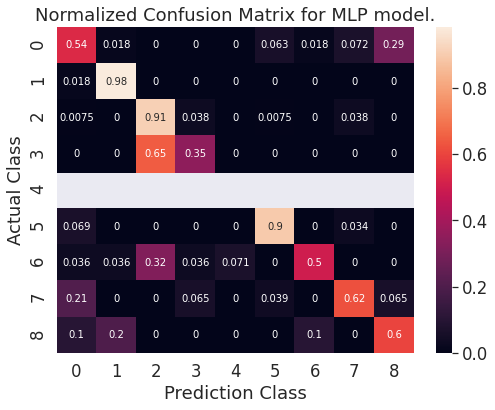

In [27]:
cm = confusion_matrix(pred_y, test_y)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, range(9), range(9))
plt.figure(figsize=(8,6))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, annot_kws={"size":10})
plt.xlabel("Prediction Class")
plt.ylabel("Actual Class")
plt.title("Normalized Confusion Matrix for MLP model.")
plt.show()

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [45]:
logR = LogisticRegression(C=0.001, solver='newton-cg', multi_class='multinomial', penalty='l2', max_iter=100, verbose=2)

In [47]:
logR.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min finished


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=2,
                   warm_start=False)

In [48]:
pred_y = logR.predict(test_x)

In [49]:
print("accuracy = ", accuracy_score(test_y, pred_y))
print("F-score = ", f1_score(test_y, pred_y, average='weighted'))
print("Precision = ", precision_score(test_y, pred_y, average='weighted'))
print("Recall = ", recall_score(test_y, pred_y, average='weighted'))
print("R2-score = ", r2_score(test_y, pred_y))

accuracy =  0.9080882352941176
F-score =  0.9088648303288868
Precision =  0.9167585219304417
Recall =  0.9080882352941176
R2-score =  0.7082917666111921


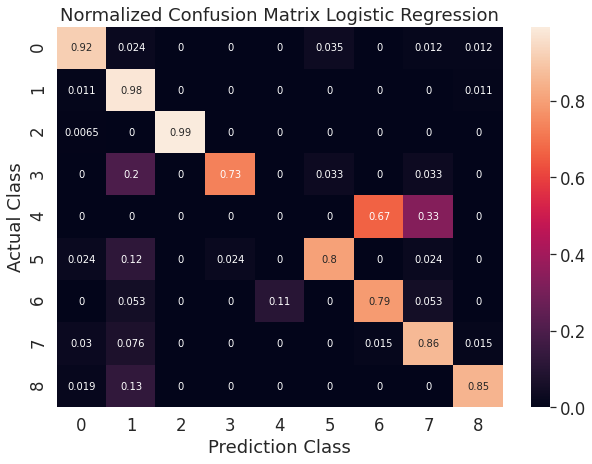

In [50]:
cm = confusion_matrix(pred_y, test_y)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, range(9), range(9))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.5) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size":10}) # font size
plt.xlabel("Prediction Class")
plt.ylabel("Actual Class")
plt.title("Normalized Confusion Matrix Logistic Regression")
plt.show()

## Feed Forward Neural Networks as Universal approximators. Using Keras API of Tensorflow.

In [51]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=None, shuffle=True)

train_x = np.asanyarray(train_x).astype('float64')
test_x = np.asanyarray(test_x).astype('float64')

train_y = np.asanyarray(train_y)
test_y = np.asanyarray(test_y)

In [52]:
print('Train')
print('x - ',train_x.shape)
print('y - ',train_y.shape)
print('- - - - -')
print('Test')
print('x - ',test_x.shape)
print('y - ',test_y.shape)

Train
x -  (8694, 258)
y -  (8694, 1)
- - - - -
Test
x -  (2174, 258)
y -  (2174, 1)


In [53]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### Creating a neural network of 11 fully connected layers, each layer having varying number of neurons in each of the hidden layer.

In [86]:
model = Sequential()
model.add(Dense(100,activation='tanh',input_shape=(train_x.shape[1],)))
model.add(Dense(150,activation='tanh' ))
model.add(Dense(200,activation='tanh' ))
model.add(Dense(250,activation='tanh' ))
model.add(Dense(300,activation='tanh' ))
model.add(Dense(300,activation='tanh' ))
model.add(Dense(250,activation='tanh' ))
model.add(Dense(200,activation='tanh' ))
model.add(Dense(150,activation='tanh' ))
model.add(Dense(100,activation='tanh' ))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=["accuracy"])

model.fit(train_x, train_y, epochs=300, verbose=2)

Epoch 1/300
272/272 - 1s - loss: 1.1052 - accuracy: 0.6371
Epoch 2/300
272/272 - 1s - loss: 0.8885 - accuracy: 0.7108
Epoch 3/300
272/272 - 1s - loss: 0.8363 - accuracy: 0.7154
Epoch 4/300
272/272 - 1s - loss: 0.8918 - accuracy: 0.6812
Epoch 5/300
272/272 - 1s - loss: 0.9491 - accuracy: 0.6662
Epoch 6/300
272/272 - 1s - loss: 1.0066 - accuracy: 0.6476
Epoch 7/300
272/272 - 1s - loss: 0.9417 - accuracy: 0.6691
Epoch 8/300
272/272 - 1s - loss: 0.9714 - accuracy: 0.6620
Epoch 9/300
272/272 - 1s - loss: 1.0584 - accuracy: 0.6251
Epoch 10/300
272/272 - 1s - loss: 1.0419 - accuracy: 0.6295
Epoch 11/300
272/272 - 1s - loss: 0.9707 - accuracy: 0.6514
Epoch 12/300
272/272 - 1s - loss: 0.9254 - accuracy: 0.6590
Epoch 13/300
272/272 - 1s - loss: 0.9715 - accuracy: 0.6377
Epoch 14/300
272/272 - 1s - loss: 0.9648 - accuracy: 0.6308
Epoch 15/300
272/272 - 1s - loss: 0.9287 - accuracy: 0.6618
Epoch 16/300
272/272 - 1s - loss: 0.9039 - accuracy: 0.6858
Epoch 17/300
272/272 - 1s - loss: 0.9303 - accura

In [87]:
pred_y = model.predict(test_x)

In [88]:
print("accuracy = ", accuracy_score(np.argmax(test_y,axis=1), np.argmax(pred_y, axis=1)))
print("F-score = ", f1_score(np.argmax(test_y,axis=1), np.argmax(pred_y,axis=1), average='weighted'))
print("Precision = ", precision_score(np.argmax(test_y,axis=1), np.argmax(pred_y,axis=1), average='weighted'))
print("Recall = ", recall_score(np.argmax(test_y,axis=1), np.argmax(pred_y,axis=1), average='weighted'))
print("R2-score = ", r2_score(test_y, pred_y))

accuracy =  0.6573137074517019
F-score =  0.5901403706298669
Precision =  0.6719800853431052
Recall =  0.6573137074517019
R2-score =  0.26699928021258207


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print(confusion_matrix(np.argmax(pred_y,axis=1), np.argmax(test_y, axis=1)))

[[ 34   5   0   3   1   4   2   3   0]
 [ 35 444   0   0   0  10   0   2  12]
 [  5   3 553  84  10  24  70  52   2]
 [  1   1   0   8   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   7   0   0   0  36   0   1   0]
 [  0   1   1   0   0   0   1   3   0]
 [ 99   3   0   7   0  44   3 165   0]
 [149  32   0   0   0  55   4   5 188]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


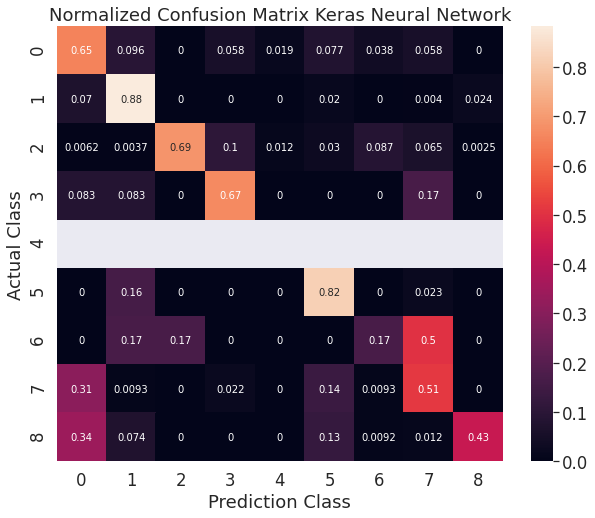

In [90]:
cm = confusion_matrix(np.argmax(pred_y, axis=1), np.argmax(test_y, axis=1))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, range(9), range(9))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5) 
sns.heatmap(cm, annot=True, annot_kws={"size":10})
plt.xlabel("Prediction Class")
plt.ylabel("Actual Class")
plt.title("Normalized Confusion Matrix Keras Neural Network")
plt.show()

### Model's Ranking in terms of F1-score

---
#### 1. Logistic Regression = 0.90 

---
#### 2. Multi-layered Perceptron = 0.74

---
#### 3. Keras Neural Network = 0.59





